In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model  #from sklear.linear_model import LinearRegression 
import statsmodels.formula.api as sfa
from sklearn.metrics import r2_score

In [131]:
income = pd.read_csv('C:\\Users\\Acer\\Desktop\\ML\\DATA\\canada_per_capita_income.csv')
income

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


Text(0, 0.5, 'income')

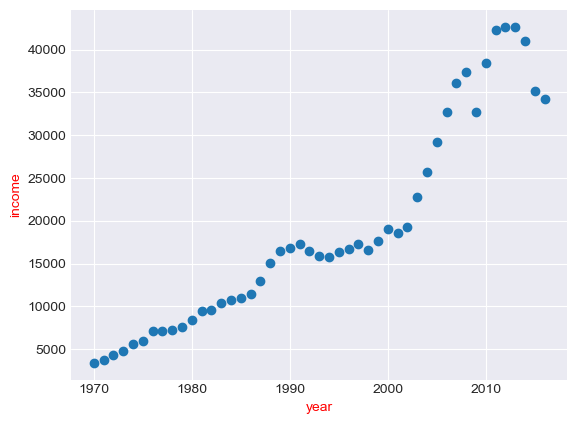

In [132]:
plt.scatter(income['year'],income['per capita income (US$)'])
plt.xlabel('year', color='red')
plt.ylabel('income', color='red')

In [133]:
regr = linear_model.LinearRegression()
regr.fit(income[['year']],income['per capita income (US$)'])

LinearRegression()

In [134]:
regr.predict([[2023]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])

In [135]:
regr.coef_

array([828.46507522])

In [136]:
regr.intercept_

-1632210.7578554575

In [137]:
828.46507522*2023+-1632210.7578554575

43774.08931460255

In [138]:
income.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


In [139]:
x = income[['year']]
y = income['per capita income (US$)']

from sklearn.model_selection import train_test_split

In [140]:
x_tr,x_ts,y_tr,y_ts = train_test_split(x,y,test_size=0.20,random_state=10)
y_tr

45    35175.188980
2      4251.175484
37    36144.481220
32    19232.175560
10     8355.968120
21    17266.097690
34    25719.147150
27    17310.757750
18    15080.283450
31    18601.397240
1      3768.297935
12     9619.438377
33    22739.426280
42    42665.255970
26    16699.826680
5      5998.144346
13    10416.536590
22    16412.083090
19    16426.725480
17    12974.806620
14    10790.328720
4      5576.514583
38    37446.486090
24    15755.820270
11     9434.390652
16    11482.891530
43    42676.468370
46    34229.193630
8      7247.967035
40    38420.522890
29    17581.024140
25    16369.317250
28    16622.671870
0      3399.299037
15    11018.955850
36    32738.262900
9      7602.912681
Name: per capita income (US$), dtype: float64

In [141]:
## making the data standardize
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_tr = scaler.fit_transform(x_tr)
x_ts = scaler.transform(x_ts)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\nx_tr = scaler.fit_transform(x_tr)\nx_ts = scaler.transform(x_ts)'

In [142]:
model = sfa.ols('income.iloc[:,1]~year',data=income).fit()
pred = model.predict(x_ts)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      income.iloc[:, 1]   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     367.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.80e-23
Time:                        15:41:27   Log-Likelihood:                -455.71
No. Observations:                  47   AIC:                             915.4
Df Residuals:                      45   BIC:                             919.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.632e+06   8.61e+04    -18.951      0.000   -1.81e+06   -1.46e+06
year         828.4651     43.214     19.171      0.000     741.427     915.503
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.647
Skew:                           0.130   Prob(JB):                        0.724
Kurtosis:                       2.487   Cond. No.                     2.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Acer\AppData\Local\Temp\ipykernel_8468\3322432379.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


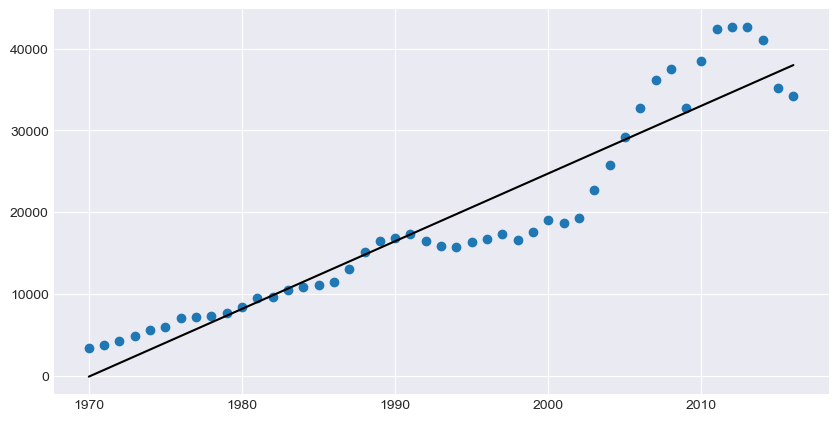

In [143]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
plt.scatter(income['year'],income['per capita income (US$)'])
plt.plot(income['year'],model.predict(),color='black')

In [144]:
model2 = sfa.ols('np.log(income.iloc[:,1])~year',data=income).fit()
pred2 = model2.predict(x_ts)
model2.summary()
pred2

35    10.228226
23     9.628360
41    10.528158
39    10.428181
44    10.678124
20     9.478394
3      8.628585
30     9.978282
7      8.828540
6      8.778551
dtype: float64

C:\Users\Acer\AppData\Local\Temp\ipykernel_8468\4269634136.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'per capita income(US$)')

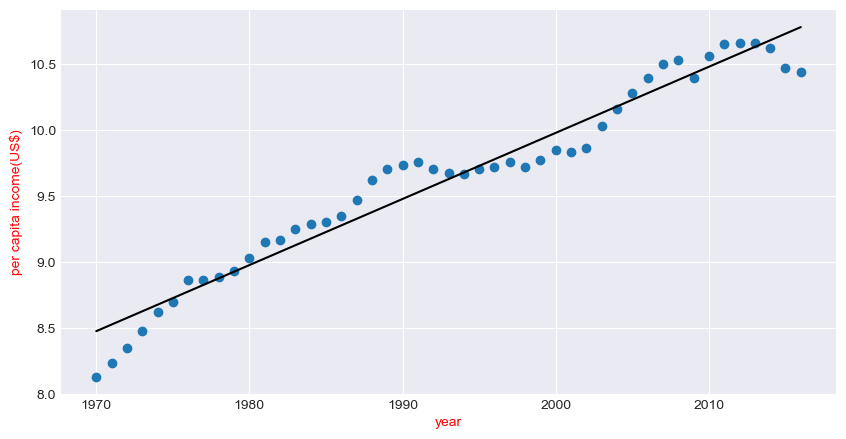

In [145]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
plt.scatter(income['year'],np.log(income['per capita income (US$)']))
plt.plot(income['year'],model2.fittedvalues,color='black')
plt.xlabel('year',color='red')
plt.ylabel('per capita income(US$)',color='red')

In [146]:
predata = pd.read_csv('C:\\Users\\Acer\\Desktop\\ML\\New folder\\canada prediction value.csv')
predata

,year
0,2015
1,2016
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


In [147]:
values = regr.predict(predata)
values

array([37146.3687183 , 37974.83379353, 39631.76394397, 40460.22901919,
       41288.69409442, 42117.15916964, 42945.62424486, 43774.08932009,
       44602.55439531, 45431.01947053])

In [148]:
## creatoing the new column of predicted values
predata['per capita income (US$)'] = values
predata

,year,per capita income (US$)
0,2015,37146.368718
1,2016,37974.833794
2,2018,39631.763944
3,2019,40460.229019
4,2020,41288.694094
5,2021,42117.159170
6,2022,42945.624245
7,2023,43774.089320
8,2024,44602.554395
9,2025,45431.019471


In [149]:
## this part of code will import the predicted value to CSV file(create the new CSV file)
predata.to_csv('canada predivted.csv',index=False)

In [155]:
regr.predict([[2025]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45431.01947053])